In [7]:
import nltk
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from wordcloud import WordCloud
from transformers import BertTokenizer

In [8]:
combined_data = pd.read_csv('data/smartsense data - merged.csv')

In [9]:
combined_data.head()

,Email,Category
0,"Could you confirm the class timings for the ""S...",student
1,IBM Quantum is launching a collaborative resea...,corporate
2,We are working on a research project involving...,research
3,Could you please provide the syllabus for the ...,student
4,Toyota Research Institute is offering internsh...,corporate


In [10]:
# Average length of emails by splitting on spaces
average_length = sum([len(email.split()) for email in combined_data['Email']]) / len(combined_data['Email'])
average_length

31.432646592709983

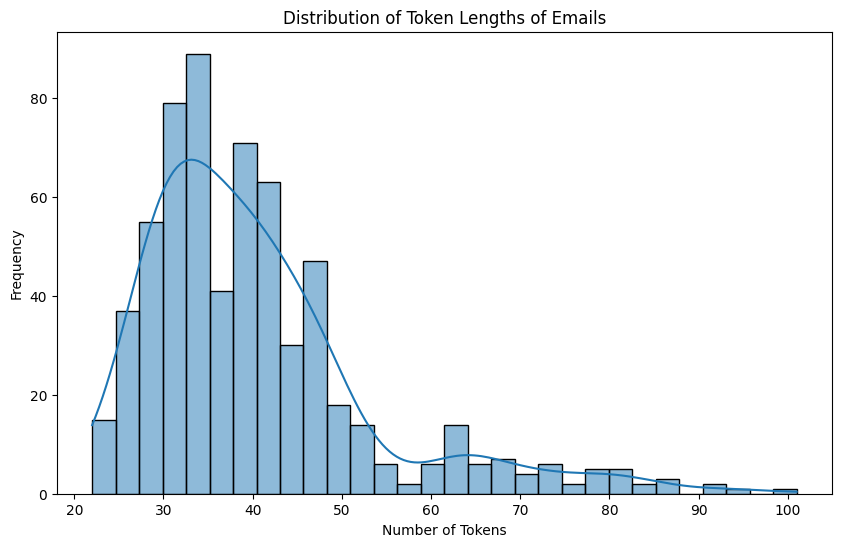

In [11]:


# Initialize the tokenizer (using BERT tokenizer as an example)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Function to calculate the token lengths for each email
def get_token_lengths(emails, tokenizer):
    token_lengths = []
    for email in emails:
        tokens = tokenizer.encode(email, add_special_tokens=True, truncation=True, max_length=512)  # Tokenize email
        token_lengths.append(len(tokens))  # Append the length of the tokenized email
    return token_lengths

# Get token lengths for the email column
email_texts = combined_data['Email'].tolist()
token_lengths = get_token_lengths(email_texts, tokenizer)

# Plot the distribution of token lengths
plt.figure(figsize=(10, 6))
sns.histplot(token_lengths, bins=30, kde=True)
plt.title('Distribution of Token Lengths of Emails')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ankityadav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


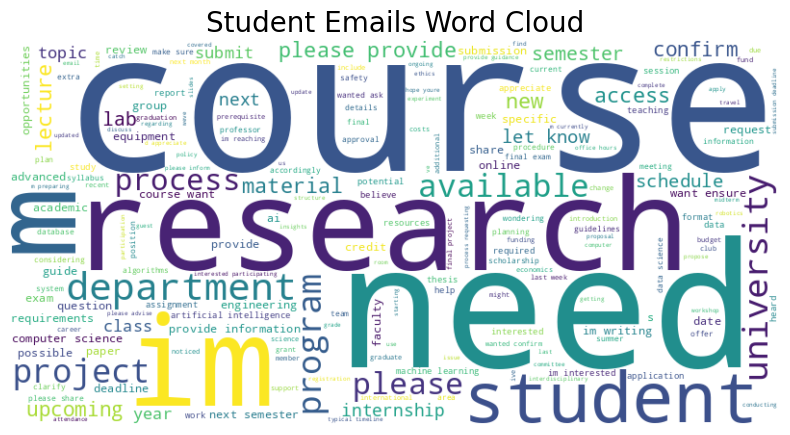

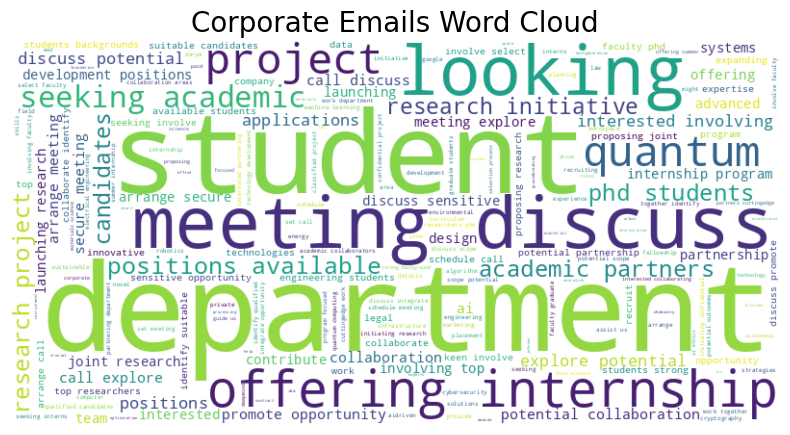

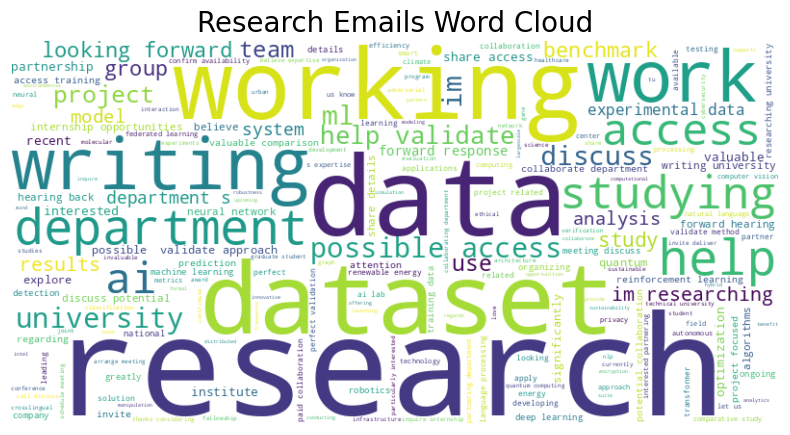

In [12]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove punctuation and convert text to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)

# Create a word cloud for each category
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

student_emails = combined_data[combined_data['Category'] == 'student']['Email'].apply(preprocess_text)
corporate_emails = combined_data[combined_data['Category'] == 'corporate']['Email'].apply(preprocess_text)
research_emails = combined_data[combined_data['Category'] == 'research']['Email'].apply(preprocess_text)

# Generate word clouds
generate_wordcloud(student_emails, 'Student Emails Word Cloud')
generate_wordcloud(corporate_emails, 'Corporate Emails Word Cloud')
generate_wordcloud(research_emails, 'Research Emails Word Cloud')
